In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

Este é o notebook das tarefas sobre Time Series

Primeiro passo: importar os dados de CO2

In [3]:
co2_csv = pd.read_csv("F:/Flakers/Workplace/data_sicence_mit_micromasters/data_analysis_statistical_modeling_computation_applications/module4/exam/CO2.csv")
co2_csv.head()

,Yr,Mn,Date,Date,CO2,seasonally,fit,seasonally,CO2,seasonally
0,1958,1,21200,1958.0411,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
1,1958,2,21231,1958.1260,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
2,1958,3,21259,1958.2027,315.70,314.43,316.19,314.90,315.70,314.43
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.98,317.45,315.16
4,1958,5,21320,1958.3699,317.51,314.71,317.86,315.06,317.51,314.71


In [4]:
co2_original = np.array(co2_csv[co2_csv.columns[4]])
co2_original

array([-99.99, -99.99, 315.7 , 317.45, 317.51, -99.99, 315.86, 314.93,
       313.21, -99.99, 313.33, 314.67, 315.58, 316.48, 316.65, 317.72,
       318.29, 318.15, 316.54, 314.8 , 313.84, 313.33, 314.81, 315.58,
       316.43, 316.98, 317.58, 319.03, 320.04, 319.59, 318.18, 315.9 ,
       314.17, 313.83, 315.  , 316.19, 316.89, 317.7 , 318.54, 319.48,
       320.58, 319.77, 318.57, 316.79, 314.99, 315.31, 316.1 , 317.01,
       317.94, 318.55, 319.68, 320.57, 321.02, 320.62, 319.61, 317.4 ,
       316.25, 315.42, 316.69, 317.7 , 318.74, 319.07, 319.86, 321.38,
       322.25, 321.48, 319.74, 317.77, 316.21, 315.99, 317.07, 318.35,
       319.57, -99.99, -99.99, -99.99, 322.25, 321.89, 320.44, 318.69,
       316.7 , 316.87, 317.68, 318.71, 319.44, 320.44, 320.89, 322.14,
       322.17, 321.87, 321.21, 318.87, 317.82, 317.3 , 318.87, 319.42,
       320.62, 321.6 , 322.39, 323.7 , 324.08, 323.75, 322.38, 320.36,
       318.64, 318.1 , 319.78, 321.03, 322.33, 322.5 , 323.04, 324.42,
      

In [5]:
# Dropar os valores -99.99
co2_missing_values_dropped = []
dia_time_fixed = []
t = 0
for value in co2_original:
    if value == -99.99:
        t += 1
        continue
    co2_missing_values_dropped.append(value)
    dia_time_fixed.append((t+0.5)/12)
    t += 1
co2_missing_values_dropped = np.array(co2_missing_values_dropped)
dia_time_fixed = np.array(dia_time_fixed).reshape(-1, 1)

Com os dados básicos de CO2 importados, vamos tentar fazer uma aproximação utilizando LinearRegression do scikit-learn para apenas dois parâmetros,
plotar o residual e calcular os erros relacionados.

Obs: espera-se uma divisão de treino e teste de 80 - 20.

In [497]:
X_train = dia_time_fixed[0:587]
X_test = dia_time_fixed[587:]

In [498]:
y_train = co2_missing_values_dropped[0:587]
y_test = co2_missing_values_dropped[587:]

In [499]:
co2_linear_regression = LinearRegression().fit(X_train, y_train)
co2_linear_regression

LinearRegression()

Qual o apha0 e alpha1? 

Lembrando que uma regressão linear tem o seguinte formato:

x = alpha_0 + alpha_1 * t

In [500]:
alpha_0 = co2_linear_regression.intercept_
alpha_0

308.9916567323666

In [501]:
alpha_1 = co2_linear_regression.coef_
alpha_1

array([1.40669115])

Plotar os residuais

In [502]:
y_train_predicted = co2_linear_regression.predict(X=X_train)
y_train_predicted

array([309.28471739, 309.40194165, 309.51916591, 309.75361444,
       309.8708387 , 309.98806296, 310.22251149, 310.33973575,
       310.45696001, 310.57418428, 310.69140854, 310.8086328 ,
       310.92585706, 311.04308133, 311.16030559, 311.27752985,
       311.39475411, 311.51197838, 311.62920264, 311.7464269 ,
       311.86365116, 311.98087542, 312.09809969, 312.21532395,
       312.33254821, 312.44977247, 312.56699674, 312.684221  ,
       312.80144526, 312.91866952, 313.03589379, 313.15311805,
       313.27034231, 313.38756657, 313.50479084, 313.6220151 ,
       313.73923936, 313.85646362, 313.97368789, 314.09091215,
       314.20813641, 314.32536067, 314.44258494, 314.5598092 ,
       314.67703346, 314.79425772, 314.91148199, 315.02870625,
       315.14593051, 315.26315477, 315.38037904, 315.4976033 ,
       315.61482756, 315.73205182, 315.84927609, 315.96650035,
       316.08372461, 316.20094887, 316.31817314, 316.4353974 ,
       316.55262166, 316.66984592, 316.78707019, 316.90

In [503]:
y_train_predicted_residuais = y_train - y_train_predicted
y_train_predicted_residuais

array([ 6.41528261e+00,  8.04805835e+00,  7.99083409e+00,  6.10638556e+00,
        5.05916130e+00,  3.22193704e+00,  3.10748851e+00,  4.33026425e+00,
        5.12303999e+00,  5.90581572e+00,  5.95859146e+00,  6.91136720e+00,
        7.36414294e+00,  7.10691867e+00,  5.37969441e+00,  3.52247015e+00,
        2.44524589e+00,  1.81802162e+00,  3.18079736e+00,  3.83357310e+00,
        4.56634884e+00,  4.99912458e+00,  5.48190031e+00,  6.81467605e+00,
        7.70745179e+00,  7.14022753e+00,  5.61300326e+00,  3.21577900e+00,
        1.36855474e+00,  9.11330475e-01,  1.96410621e+00,  3.03688195e+00,
        3.61965769e+00,  4.31243343e+00,  5.03520916e+00,  5.85798490e+00,
        6.84076064e+00,  5.91353638e+00,  4.59631211e+00,  2.69908785e+00,
        7.81863589e-01,  9.84639326e-01,  1.65741506e+00,  2.45019080e+00,
        3.26296654e+00,  3.75574228e+00,  4.76851801e+00,  5.54129375e+00,
        5.87406949e+00,  5.35684523e+00,  4.22962096e+00,  1.90239670e+00,
        6.35172439e-01, -

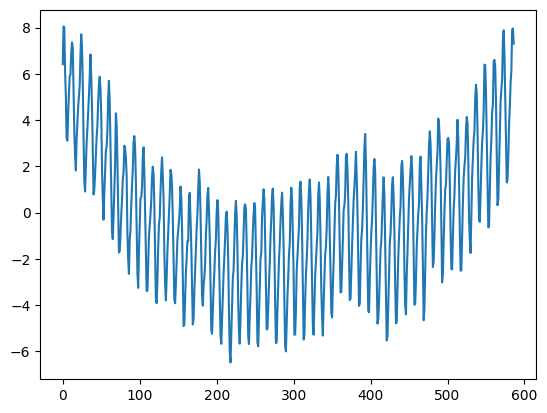

In [504]:
plt.plot(y_train_predicted_residuais)

Agora, calcular o mean squared error RMSE e o absolute percentage error MAPE

In [505]:
y_test_predicted = co2_linear_regression.predict(X=X_test)
y_test_predicted

array([378.68148076, 378.79870502, 378.91592928, 379.03315355,
       379.15037781, 379.26760207, 379.38482633, 379.5020506 ,
       379.61927486, 379.73649912, 379.85372338, 379.97094765,
       380.08817191, 380.20539617, 380.32262043, 380.4398447 ,
       380.55706896, 380.67429322, 380.79151748, 380.90874175,
       381.02596601, 381.14319027, 381.26041453, 381.3776388 ,
       381.49486306, 381.61208732, 381.72931158, 381.84653585,
       381.96376011, 382.08098437, 382.19820863, 382.3154329 ,
       382.43265716, 382.54988142, 382.66710568, 382.78432995,
       382.90155421, 383.01877847, 383.13600273, 383.253227  ,
       383.37045126, 383.48767552, 383.60489978, 383.72212405,
       383.83934831, 383.95657257, 384.07379683, 384.1910211 ,
       384.30824536, 384.42546962, 384.54269388, 384.65991814,
       384.77714241, 384.89436667, 385.01159093, 385.12881519,
       385.24603946, 385.36326372, 385.48048798, 385.59771224,
       385.71493651, 385.83216077, 385.94938503, 386.06

In [506]:
metrics.root_mean_squared_error(y_pred=y_test_predicted, y_true=y_test)

10.641458521874679

In [507]:
metrics.mean_absolute_percentage_error(y_pred=y_test_predicted, y_true=y_test)

0.024504549564431446

Fazer o mesmo mas agora fitando para um polinômio quadrático.

In [508]:
X_train_quadratic = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train)
X_test_quadratic = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_test)

In [509]:
co2_linear_regression_quadratic = LinearRegression().fit(X=X_train_quadratic, y=y_train)
co2_linear_regression_quadratic

LinearRegression()

In [510]:
co2_linear_regression_quadratic.intercept_

314.1005841870842

In [511]:
co2_linear_regression_quadratic.coef_

array([0.80209702, 0.0121175 ])

In [512]:
y_train_predicted_quadratic = co2_linear_regression_quadratic.predict(X_train_quadratic)

In [513]:
y_train_predicted_quadratic_residuais = y_train - y_train_predicted_quadratic

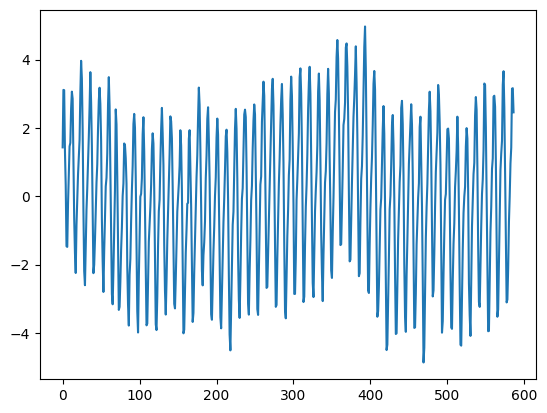

In [514]:
plt.plot(y_train_predicted_quadratic_residuais)

In [515]:
y_test_predicted_quadratic = co2_linear_regression_quadratic.predict(X_test_quadratic)

In [516]:
metrics.root_mean_squared_error(y_pred=y_test_predicted_quadratic, y_true=y_test)

2.501332219489783

In [517]:
metrics.mean_absolute_percentage_error(y_pred=y_test_predicted_quadratic, y_true=y_test)

0.005320319129740851

Novamente, a mesma coisa, mas tentando fitar para um modelo cúbico.

In [518]:
X_train_cubic = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X_train)
X_test_cubic = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X_test)

In [519]:
co2_linear_regression_cubic = LinearRegression().fit(X_train_cubic, y_train)

In [520]:
co2_linear_regression_cubic.intercept_

314.8585261562891

In [521]:
co2_linear_regression_cubic.coef_

array([ 6.24895409e-01,  2.09575674e-02, -1.18323397e-04])

In [522]:
y_train_predicted_cubic = co2_linear_regression_cubic.predict(X_train_cubic)
y_train_predicted_cubic_residuals = y_train - y_train_predicted_cubic

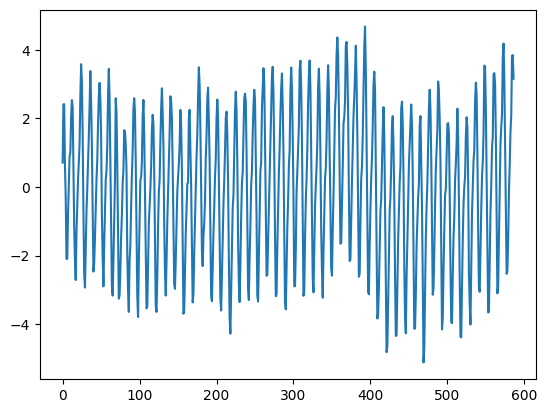

In [523]:
plt.plot(y_train_predicted_cubic_residuals)

In [524]:
y_test_predicted_cubic = co2_linear_regression_cubic.predict(X_test_cubic)

In [525]:
metrics.root_mean_squared_error(y_pred=y_test_predicted_cubic, y_true=y_test)

4.14937071213507

In [526]:
metrics.mean_absolute_percentage_error(y_pred=y_test_predicted_cubic, y_true=y_test)

0.008483502723897852

Fitando um sinal periódioco

Pelas análises de erro, percebe-se que o trend quadrático é o suficiente para representar o trend.
O cúbico acaba overfittando e, por isso, o erro acaba aumentando.

Vamos tentar analisar a sazonalidade do resíduo.
Para isso, vamos calcular a média por mês da série temporal residual depois de subtrair o trend quadrático.

In [527]:
for mes_index in range(0, 12):
    sum = 0
    count = 0
    for residuo, mes in zip(y_train_predicted_quadratic_residuais, X_train_quadratic[:, 0]):
        if int(mes) in [mes_index, mes_index+12, mes_index+24, mes_index+36, mes_index+48]:
            sum += residuo
            count += 1
    average = sum/count
    print("mes "+str(mes_index+1))
    print("average "+str(average))

mes 1
average -0.012339183358653218
mes 2
average 0.169667542094745
mes 3
average 0.03897823946586598
mes 4
average 0.11752956431779775
mes 5
average 0.15580422310681405
mes 6
average 0.02380221583292889
mes 7
average -0.11521651259205327
mes 8
average -0.149156796903578
mes 9
average -0.008655469032860926
mes 10
average 0.06052752610828923
mes 11
average -0.11723281148015137
mes 12
average -0.19006148179816051
